# Exploration Data Analysis 01

As the main data is withhin the image itself, I have done some processing which may could support the pure Image classificcation process. One of the ideas was to separate the diffrent colors per card. A human beeing looking at the cards can identify them real easy. May we can find some correlating data.

#### RGB color separation Part I
On the data exploration step we did already extract the colors layers  as histogram data specified by the following columns:
* r0 - r255 for the red layer
* g0 - g255 for the green layer
* b0 - b255 for the blue layer



# Color Separation with K-mean Clustering

In the next cell I choosed the Eicheln König as the best card for color separation. This card includes all colors as the others also do in one. I use 8 as the count of colors I would like to devide. The idea is to find out how much percent from an amount of color is available in each cardType. The frist challenge is to find the colors which are mostly used. To solve this problem I used the K-Mean Clustering algorythm. It gives me the possability to define how many colors (Clusters) I want to distinguish. I decided tu use 8 colors.

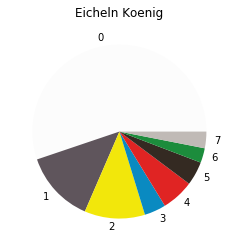

In [1]:
import JassSummarizer as js
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import shutil
import os
import cv2                                                              # computer vision python library see README.md dependencies

from sklearn.cluster import KMeans
row=0                                                                           # row counter initialization
kmeans = KMeans(n_clusters=8,random_state=0)                                    # setting clustersize to 8
                
path = r".\images\a"                                                            # defining input path
fileList = [os.path.join(dp, f) for dp, dn, filenames in os.walk(path) for f in filenames if os.path.splitext(f)[1] == '.jpg']

targetCard=fileList[7]                                                          # choose source of Eichen König
cardId=targetCard.split("\\")[-1][0:2].upper()                                  # set CardId
img = cv2.imread(targetCard)                                                    # row counter initialization
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)                                       # convert color mode to rgb
img=rgb.reshape((img.shape[1]*img.shape[0],3))                                  # reshape for 2d input shape
s=kmeans.fit(img, y=None);                                                      # fit it

labels=list(kmeans.labels_)                                                     # get labels
centroid=kmeans.cluster_centers_                                                # get cluster centers
percent=[]                                                                      # empty percent array
for i in range(len(centroid)):                                                  # iterate trough clusters
  j=labels.count(i)                                                             # get numbered labels
  j=j/(len(labels))                                                             # calc percent value
  percent.append(j)                                                             # add percent value
plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))  # draw chart
plt.title(js.jassCardName(cardId))                                              # set chart title 
plt.show()
                


# Display color distribution on all cards

The following analysis checks every card for it's used colors. As _baseline_ I'm using the card Eicheln König.I'm going to show for each card a piechart which shows the percentage per color's. Trough this process I can visualize group of cards which are similar in percentage and used colors.

> The current analysis uses none threshold on the percentage value


,,,
,,,
,,,
,,,
,,,
,,,
,,,
,,,
,,,

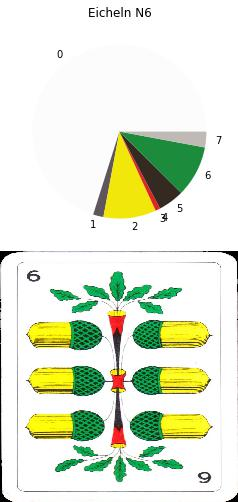
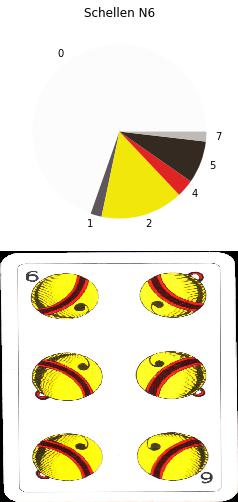
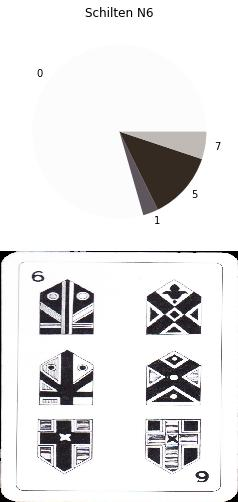
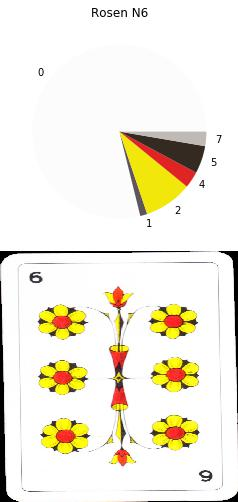
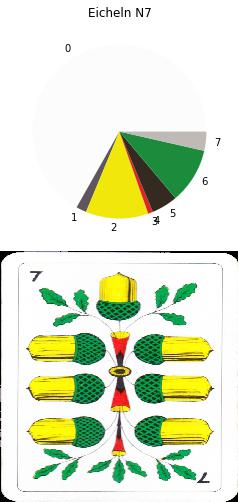
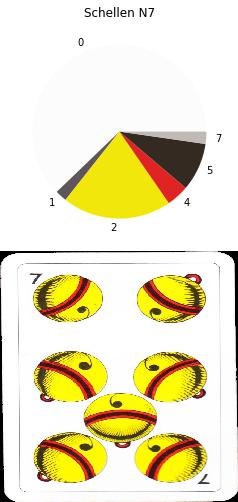
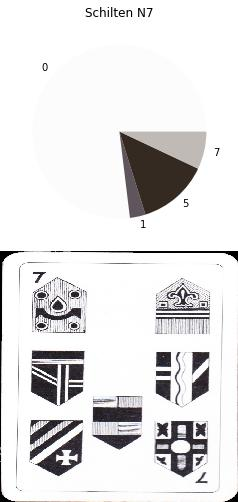
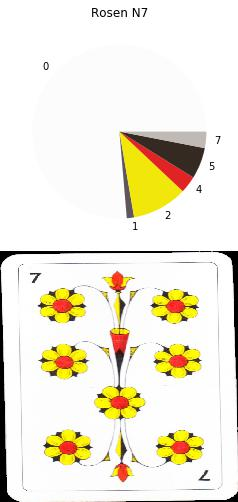
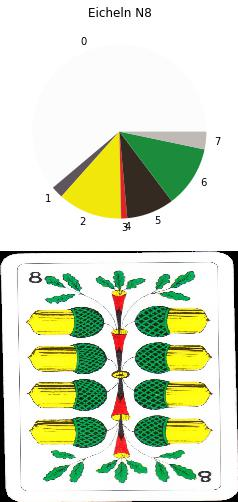
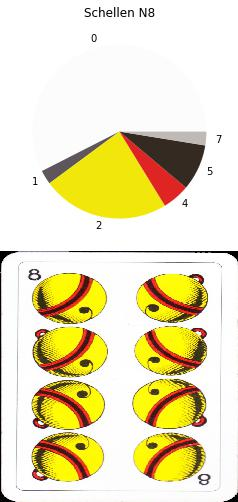
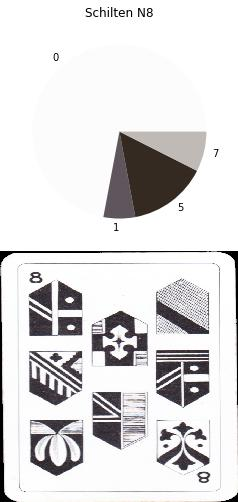
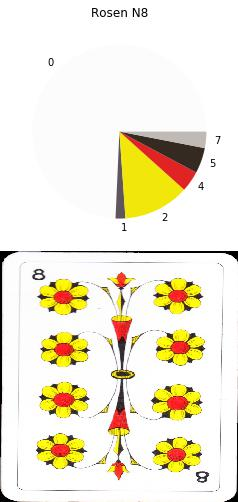
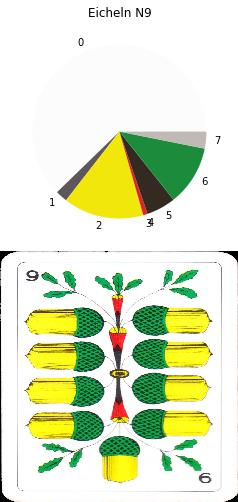
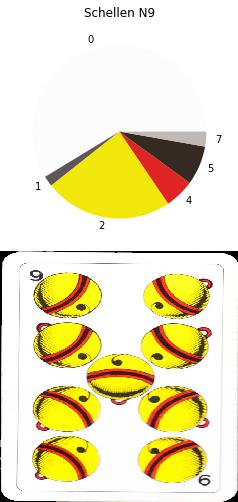
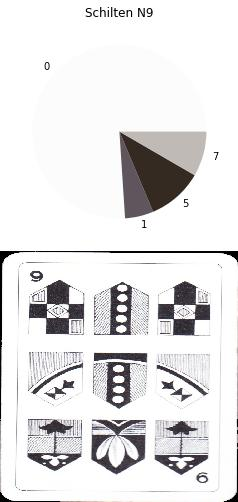
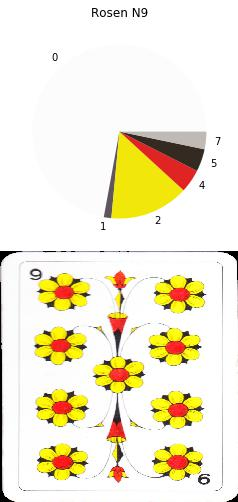
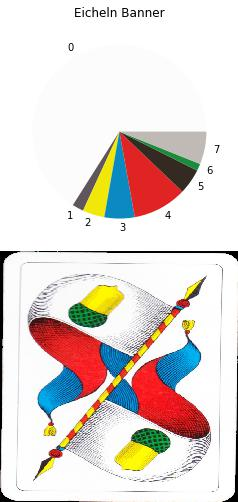
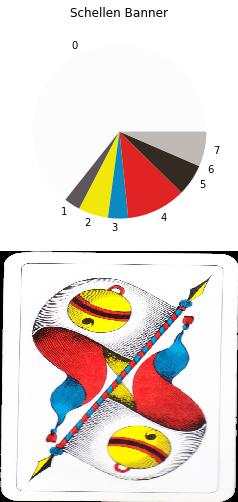
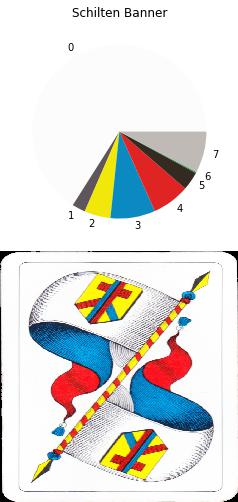
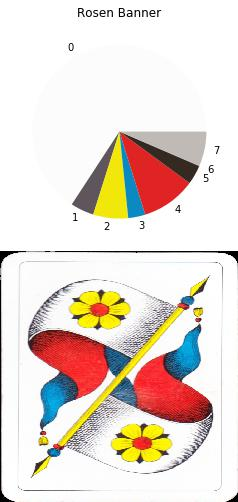
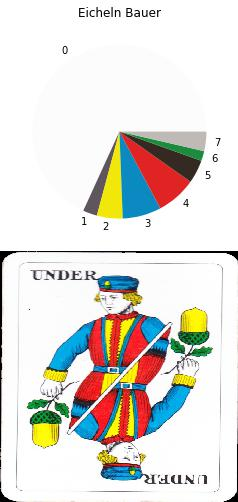
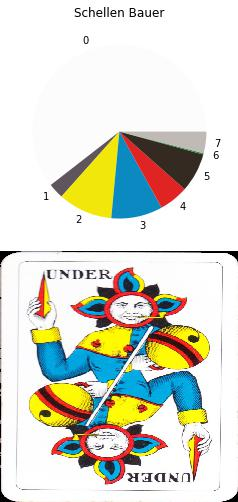
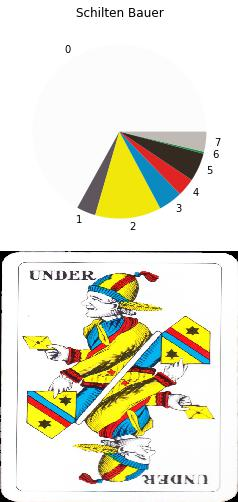
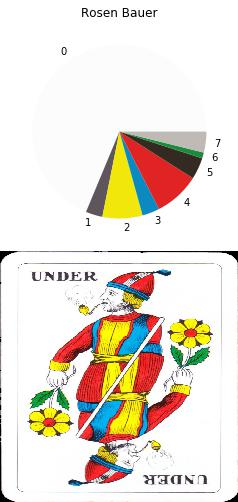
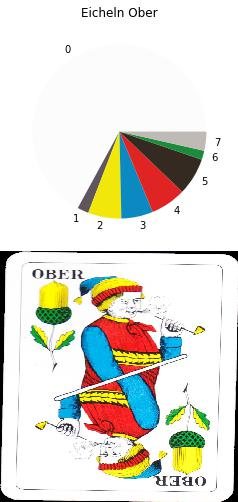
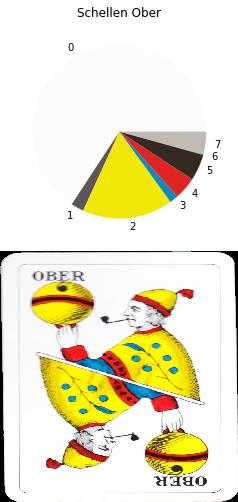
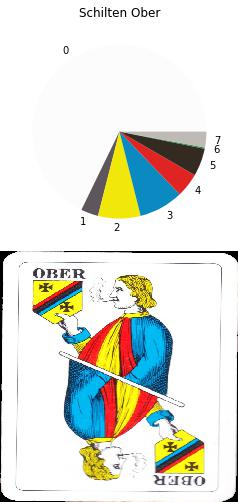
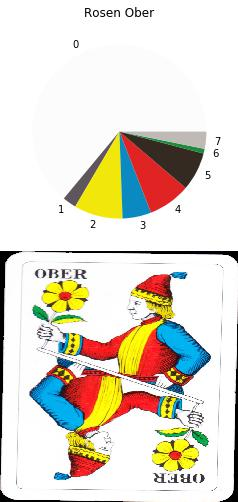
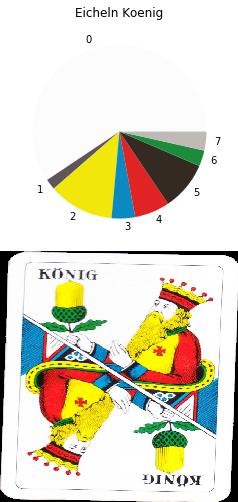
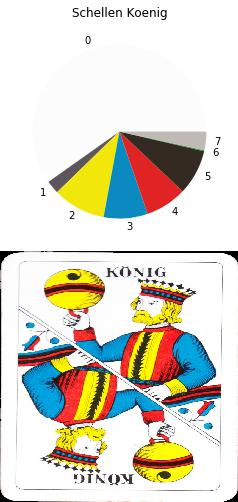
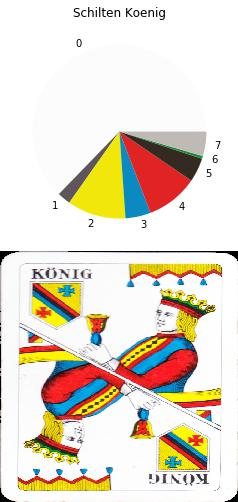
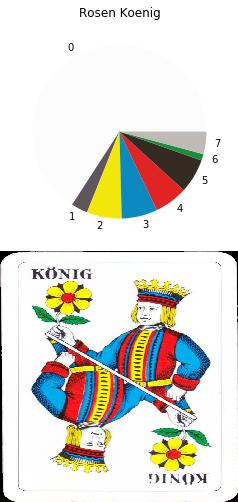
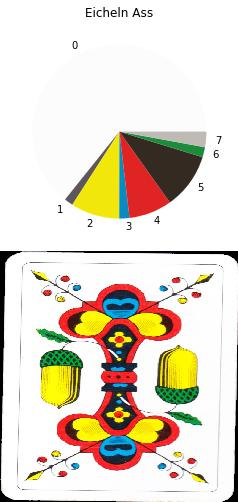
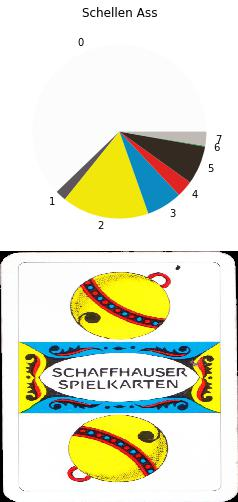
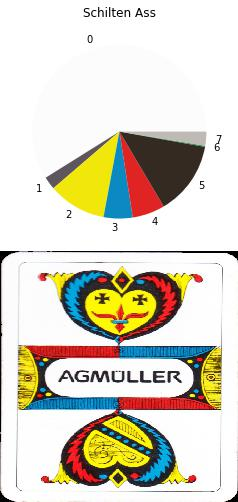
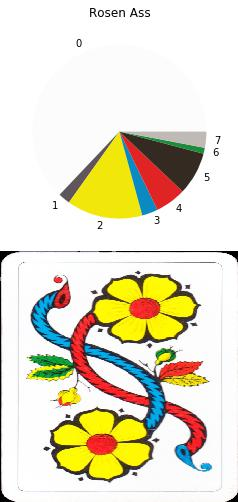

In [2]:
imageDimension=(rgb.shape[0],rgb.shape[1])
inputPath = r".\images"
cardSets=["a","b","c","d"]
fileList= []

outputPath = r".\images\temp"
if not os.path.exists(outputPath):
    os.mkdir(outputPath)

row=0                                                                           # row counter initialization
for cardNr in range(0,9):                                                       # row loop
    col=0                                                                       # col counter initialization
    for cardType in "a,b,c,d".split(","):                                       # loop trough cardTypes
        path=os.path.join(inputPath,cardType)                                   # path for image selection
        fileName=os.path.join(path,f"{cardType.upper()}{cardNr}_{str(9-cardNr).zfill(4)}.jpg")        
        img = cv2.imread(fileName)                                              # read image
        frameOrg,mask,img_rect,res,crop_img,d=js.analyzeScan(img,0.6)           # clean the gray frame around the proper card, threshold a bit higher with 0,6
        resized = cv2.resize(crop_img, imageDimension, interpolation = cv2.INTER_AREA)
        rgb = cv2.cvtColor(resized,cv2.COLOR_BGR2RGB)                           # convert to rgb
        img=rgb.reshape((imageDimension[1]*imageDimension[0],3))                # resize to chart size from Eicheln könig - feature set
        s=kmeans.predict(img)                                                   # predict colors
        percent=[]                                                              # empty 
        q=np.unique(s,return_counts=True)                                       # q stores the colors found
        total=np.sum(q[1])                                                      # count total

        index=0                                                                 # loop counter for colors found
        cent2=[]                                                                # centroid of clusters
        for i in range(len(centroid)):                                          # loop trough centroids
          if index ==len(q[0]):                                                 # are all colors done
            break                                                               # if yes break      
          if q[0][index]!=i:                                                    # if color is not available in the analyzing card
            continue                                                            # then take next
          j=100/total*q[1][index]                                               # otherwise get percentage
          cent2.append(centroid[i]/255)                                         # get color
          index=index+1                                                         # next color
          percent.append(j)                                                     # add percent value
        plt.title(js.jassCardName(f"{cardType.upper()}{cardNr}"))               # set tile in chart
        plt.pie(percent,colors=np.array(cent2),labels=q[0])                     # draw pie chart
        plt.savefig(os.path.join(outputPath,f"temp_{cardType.upper()}{cardNr}.png"), bbox_inches='tight')
        plt.close()
        col=col+1                                                                # next cardType
    row=row+1                                                                    # next card 
if 1==1:    
    col=row=0                                                                    # row counter initialization
    data=[]
    for cardNr in range(0,9):                                                    # row loop
        col=0                                                                    # col counter initialization
        for cardType in "a,b,c,d".split(","):            
            temp=cv2.imread(os.path.join(outputPath,f"temp_{cardType.upper()}{cardNr}.png"))
            path=os.path.join(inputPath,cardType)
            fileName=os.path.join(path,f"{cardType.upper()}{cardNr}_{str(9-cardNr).zfill(4)}.jpg")        
            img = cv2.imread(fileName)
            frameOrg,mask,img_rect,res,crop_img,d=js.analyzeScan(img,0.6)
            resized = cv2.resize(crop_img, imageDimension, interpolation = cv2.INTER_NEAREST)
            temp2= cv2.resize(resized, (temp.shape[1],temp.shape[0]), interpolation=cv2.INTER_NEAREST)
            temp2 = cv2.cvtColor(temp2,cv2.COLOR_BGR2RGB)        
            temp = cv2.cvtColor(temp,cv2.COLOR_BGR2RGB)        
            vis = np.concatenate((temp, temp2), axis=0)
            #axes[row,col].set_title(js.jassCardName(f"{cardType.upper()}{cardNr}"))
            #axes[row,col].imshow(vis)
            data.append(vis)
            col=col+1
        row=row+1
#because the mathlib figure plot did not show the images proberly,
#i used my own defined HTML output routine with inline image generation        
b=np.reshape(np.array(data),[9,4]+list(np.array(data)[0].shape))
js.display_imageTable(b)

## Explanation of the code in the next cell

The idea from the next cell is to draw for each cardType and each datascan set an RGB histogram chart.  
This chart displays in a bolder plot the average curve for red, green and blue. Also, there is a range area for the min and max value for every color channel.

> NOTE: the calculation uses in every dataset all corresponding (equal) cards  and builds the min, max and average values.  
So that are summarizations for 1159, 13904 and 6480 images.

#### Conclusion and finding

* It looks like the webcam has some differences in the red channel. It's recognizable very easy on the charts from Schilten 6 til Schilten 9 cards. Because they have just gray in it
  * If this cards are only gray, why can we find some partial red tones? If you zoom in in such scan's, you can recognize some lightly red parts on the edges.
* There are very little values between min and max on the synthetical chart (datascan iv) 
* The datascan iii has a more clearly chart representation then datascan ii. That means that the galaxy camera has the better camera compared to the webcam

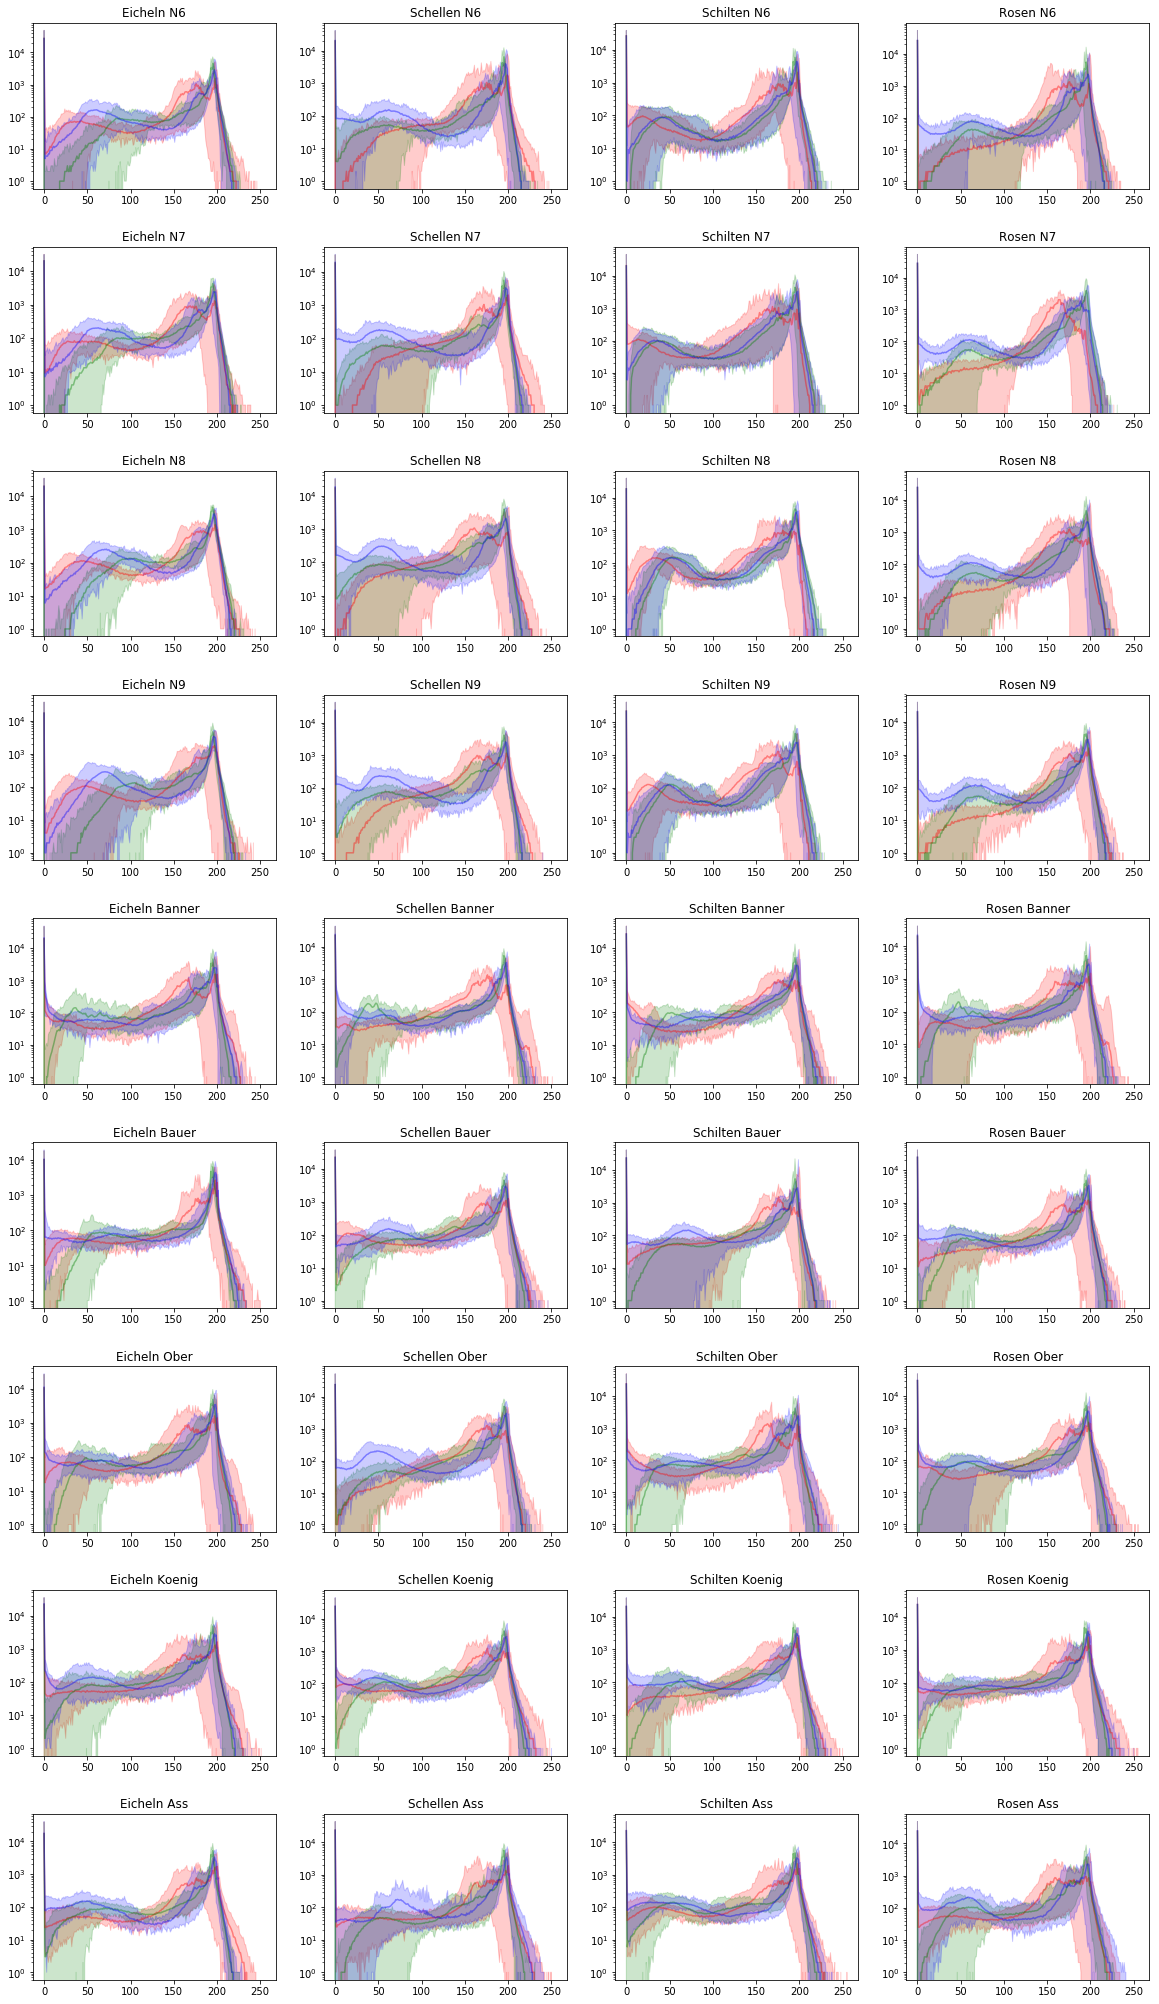

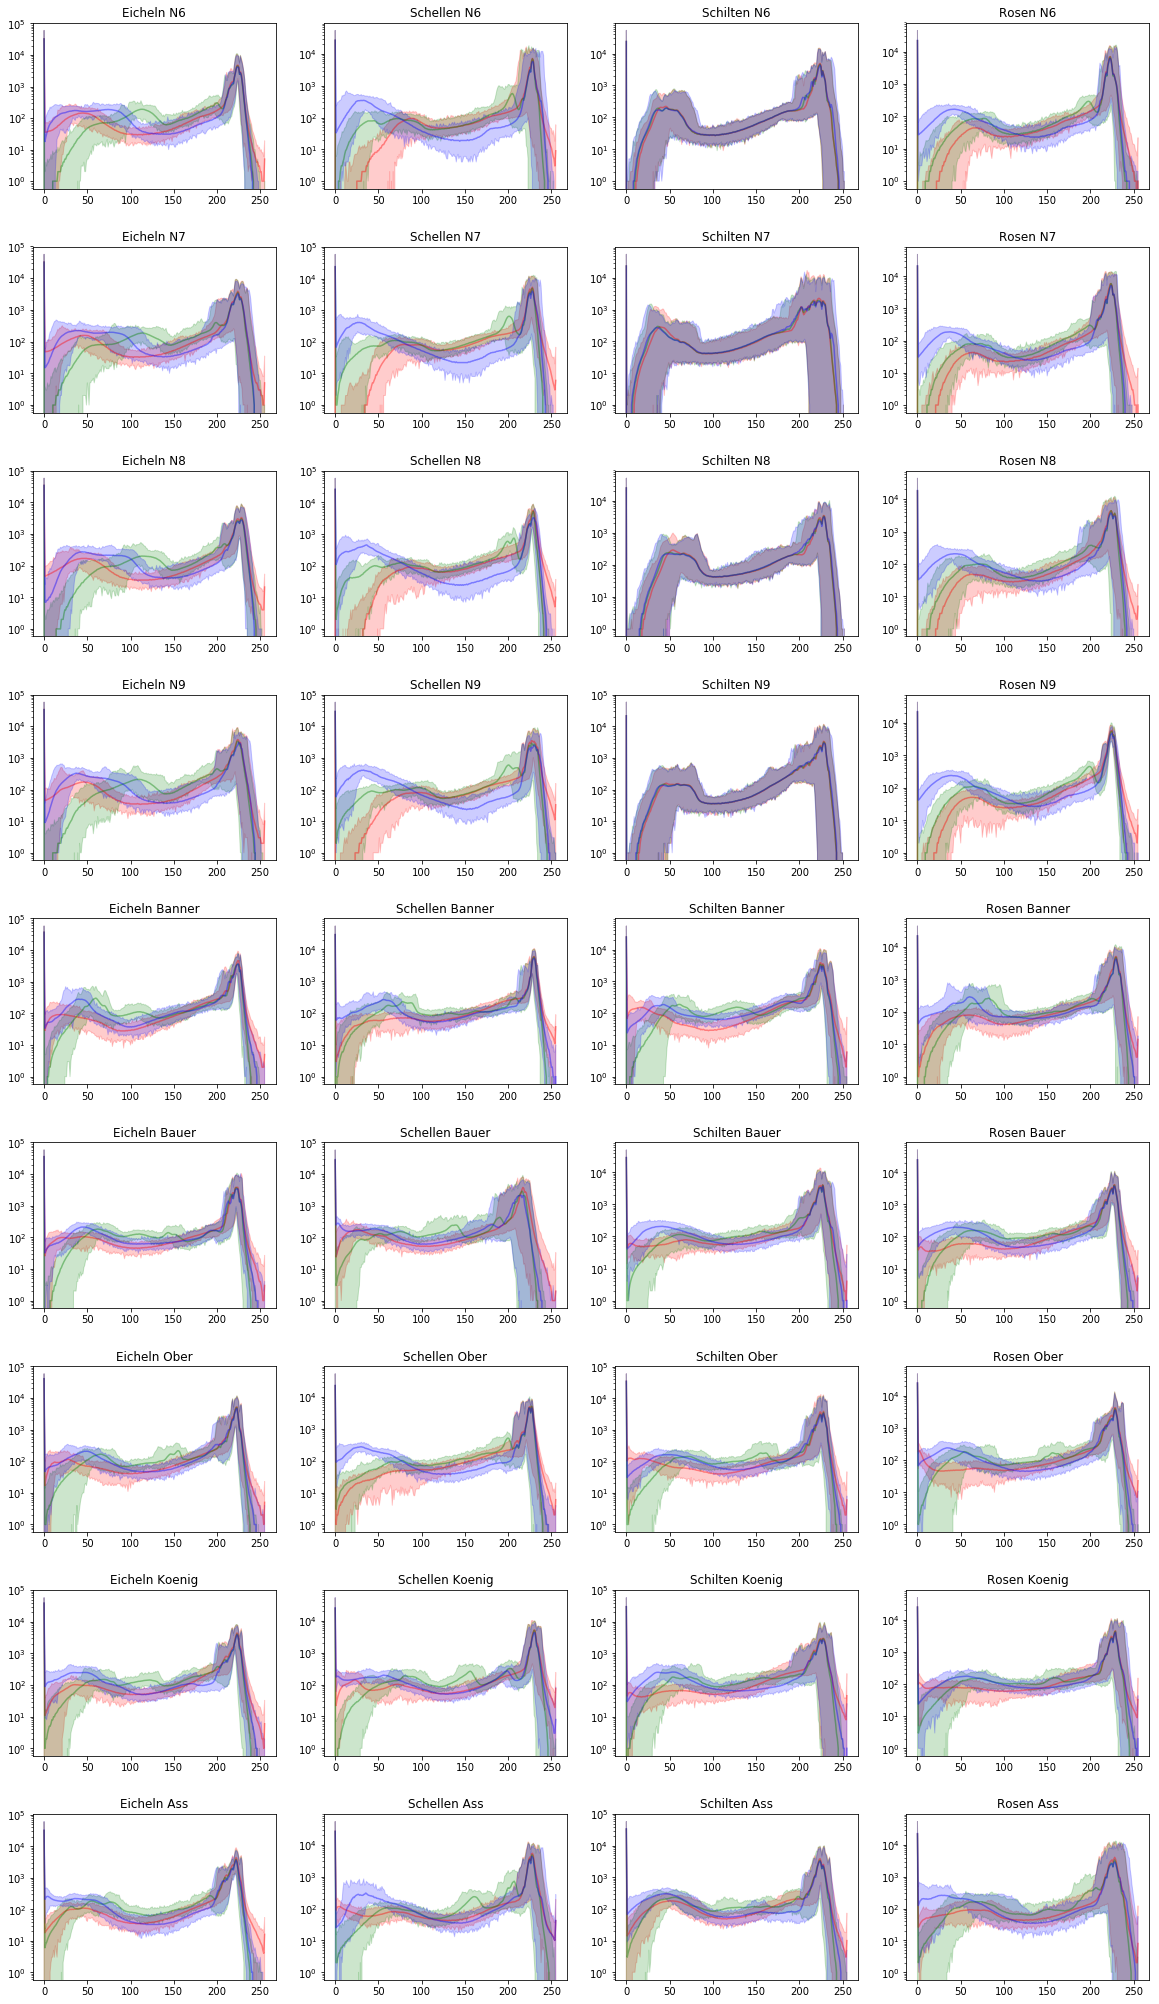

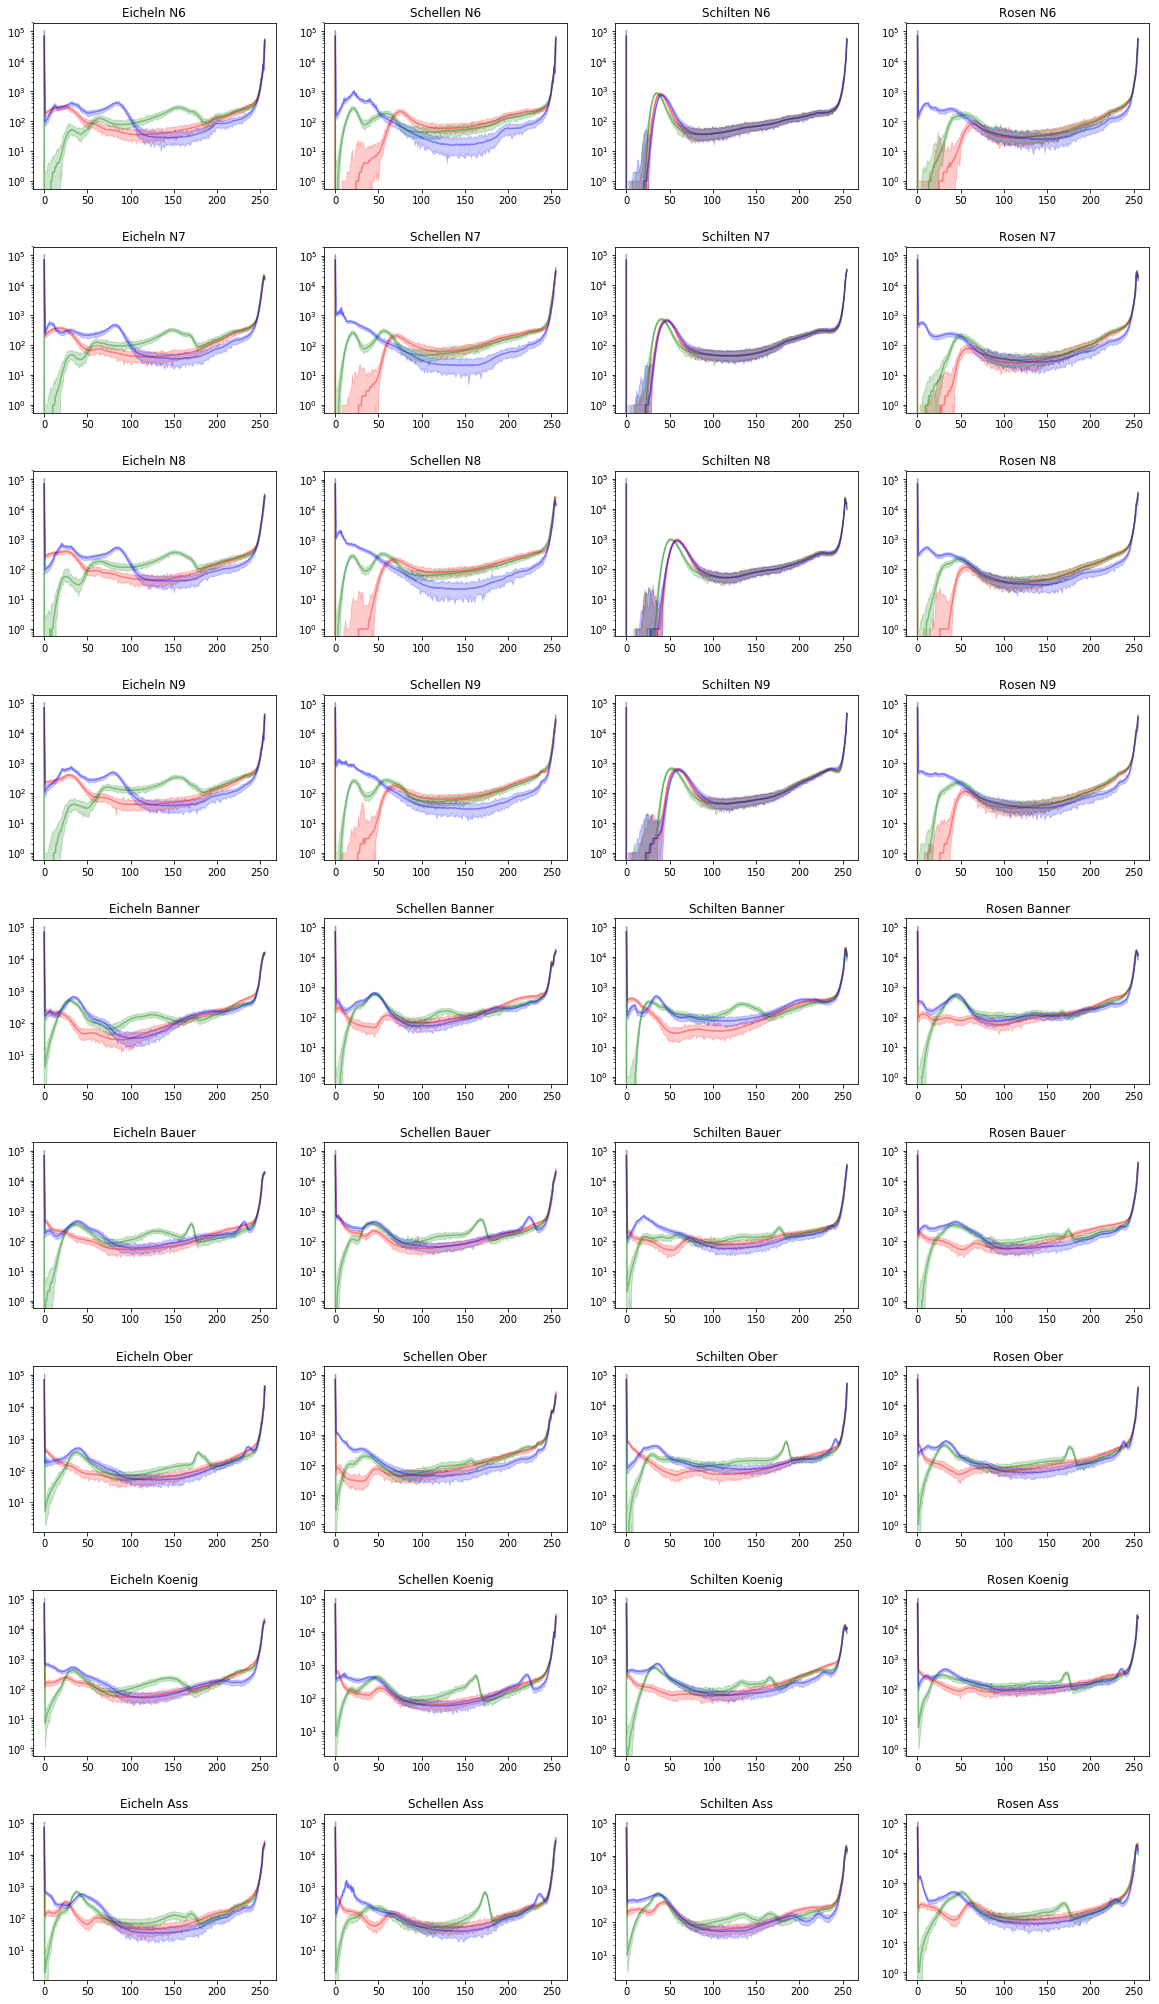

In [3]:
dataScans = ["datascan_ii.csv","datascan_iii.csv","datascan_iv.csv"]                # iterate trough available dataset
b=np.arange(0,256)                                                                  # numbered array from 0-255 for cahr x axis plot

for dataScan in dataScans:                                                          # datascan iterator
    dataScanName = dataScan.replace(".csv","")                                     # store dataset name
    df=pd.read_csv(dataScan)                                                        # load csv into dataframe
    
    display(HTML(f"<h2>RGB color histogram for:{dataScanName}</h2>"))
    display(HTML(f"<p>Total Images {df.count()[0]}</h2>"))
    display(HTML(f"<hr />"))

    fig, axes = plt.subplots(nrows=9, ncols=4,figsize=[20, 36])                     # define matrix size
    plt.subplots_adjust(hspace=0.35)                                                # make space between charts to read title

    row=0                                                                           # row counter initialization
    for cardNr in range(0,9):                                                       # row loop
        col=0                                                                       # col counter initialization
        for cardType in "a,b,c,d".split(","):                                       # loop trough cardTypes  
            cardName=js.jassCardName(cardType.upper()+str(cardNr))                  # get cardName
            cardCode=cardType.upper()+str(cardNr)                                   # cardCod is cardIdentifier
            
            # select all specific entries from tyep cardCode and only use the first 256 columns for red
            df2=pd.DataFrame(np.array(df[df["cardId"] ==cardCode])[:,9:9+256].astype("uint32"))
            a=df2.describe().T[["min","mean","max"]].astype("uint32").T
            c=a.reset_index()
            r1=(np.array(c[c["index"] =="min"])[:,1:]).astype("uint32")
            r2=(np.array(c[c["index"] =="mean"])[:,1:]).astype("uint32")
            r3=(np.array(c[c["index"] =="max"])[:,1:]).astype("uint32")
            
            # select all specific entries from tyep cardCode and only use the first 2nd 256 columns for green
            df2=pd.DataFrame(np.array(df[df["cardId"] ==cardCode])[:,9+256:9+512].astype("uint32"))
            a=df2.describe().T[["min","mean","max"]].astype("uint32").T             # calcualte min, mean and max for all identical cardTyupes in specific dataset
            c=a.reset_index()                                                       # reformating for easier selection of min,max,mean
            g1=(np.array(c[c["index"] =="min"])[:,1:]).astype("uint32")             # get min value for each G value (g0-g255)
            g2=(np.array(c[c["index"] =="mean"])[:,1:]).astype("uint32")            # get mean value for each G value (g0-g255)
            g3=(np.array(c[c["index"] =="max"])[:,1:]).astype("uint32")             # get max value for each G value (g0-g255)
            
            # select all specific entries from tyep cardCode and only use the first 3rd 256 columns for blue
            df2=pd.DataFrame(np.array(df[df["cardId"] ==cardCode])[:,9+512:].astype("uint32"))
            a=df2.describe().T[["min","mean","max"]].astype("uint32").T             # calcualte min, mean and max for all identical cardTyupes in specific dataset
            c=a.reset_index()                                                       # reformating for easier selection of min,max,mean
            b1=(np.array(c[c["index"] =="min"])[:,1:]).astype("uint32")             # get min value for each B value (b0-b255)
            b2=(np.array(c[c["index"] =="mean"])[:,1:]).astype("uint32")            # get mean value for each B value (b0-b255)
            b3=(np.array(c[c["index"] =="max"])[:,1:]).astype("uint32")             # get max value for each B value (b0-b255)

            axes[row,col].set_title(cardName)                                       # set titel in subchart      
            axes[row,col].set_yscale('log')                                         # set logarithmic scale (to many white pixels)       
            # red
            axes[row,col].plot(b,np.array(r2)[:,:].flatten(),alpha=0.4,color="r")   # draw mean curve bolder then the other. so we use alpha=0.4
            axes[row,col].fill_between(b,np.array(r1)[:,:].flatten(),np.array(r3)[:,:].flatten(),alpha=0.2,color="r")
            # green
            axes[row,col].plot(b,np.array(g2)[:,:].flatten(),alpha=0.4,color="g")   # draw mean curve bolder then the other. so we use alpha=0.4
            axes[row,col].fill_between(b,np.array(g1)[:,:].flatten(),np.array(g3)[:,:].flatten(),alpha=0.2,color="g")
            # blue
            axes[row,col].plot(b,np.array(b2)[:,:].flatten(),alpha=0.4,color="b")   # draw mean curve bolder then the other. so we use alpha=0.4
            axes[row,col].fill_between(b,np.array(b1)[:,:].flatten(),np.array(b3)[:,:].flatten(),alpha=0.2,color="b")
            col=col+1                                                               # increment col
        row=row+1                                                                   # increment row
    plt.show()        
